# Project description

**Data description**

This dataset contains information about passengers in the famous titanic ship who survived or died during the havoc. Below is a description of the dataset

**PassengerId** : Unique id number to each passenger

**Survived** : Passenger survive(1) or died(0)

**Pclass** : Passenger class

**Name** : Name

**Sex** : Gender of passenger

**Age** : Age of passenger

**SibSp** : Number of siblings/spouses

**Parch** : Number of parents/childrens

**Ticket** : Ticket Number

**Fare** : Amount of money to spend on ticket

**Cabin** : Cabin category

**Embarked** : Port where passenger embarked (C = Cherboug, Q = Queenstown, S = Southampton)

**Importing libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading the datasets**

In [2]:
df_train = pd.read_csv("/content/train (5).csv")
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df_train.shape

(891, 12)

In [3]:
df_test = pd.read_csv("/content/test (1).csv")
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
df_test.shape

(418, 11)

**Checking the train dataset**

In [6]:
# Checking the datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Describing the data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




*   The dataset contains 891 passengers
*   The average age is 30 years for the passengers
*   More than 60% of the passengers did not survive







# Cleaning the data

In [8]:
# Checking for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Embarked has only two missing records while Age and Cabin have high missing records of 177 and 687 respectively. We'll drop Age and Cabin columns and fill in Embarked column

In [76]:
# Dropping Age, Name and cabin column
df = df_train.drop(["Age", "Cabin", "Name"],axis = 1)
df.head(2)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,1,0,A/5 21171,7.2500,S
1,2,1,1,female,1,0,PC 17599,71.2833,C


In [77]:
# Checking the distribution of "C", "S" and "Q" in the Embarked column
print(df_train["Embarked"].value_counts())
# Viewing the missing rows in embarked
df_train[df_train["Embarked"].isnull()]
# Filling the missing row in embarked with S as it is predominant
df_train['Embarked'] = df_train['Embarked'].fillna('S')
# Checking for missing value
df_train["Embarked"].isnull().sum()

S    646
C    168
Q     77
Name: Embarked, dtype: int64


0

# Exploratory data analysis

0    0.616162
1    0.383838
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Survival analysis')

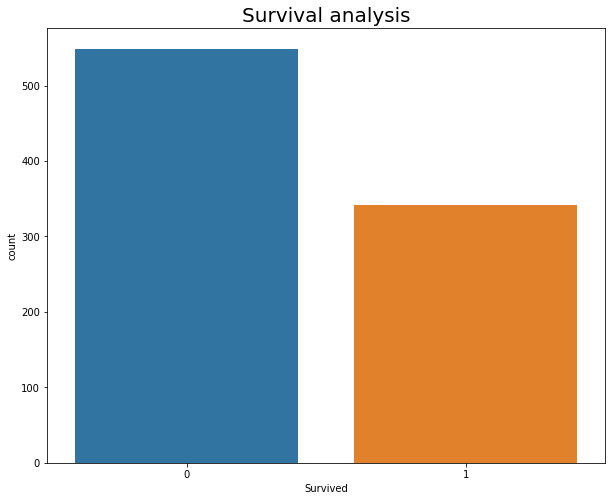

In [37]:
# Plotting a graph for the passengers who survived vs the ones who did not survive
print(df["Survived"].value_counts(normalize = True))
fig, axes = plt.subplots(figsize = (10,8))
sns.countplot(data = df, x = "Survived")
count = df_train["Survived"].value_counts()
sns.set_color_codes("pastel")
locs, labels = plt.xticks()
plt.title("Survival analysis", fontsize = 20)
# 1= survive
# 0 = dead

38% of the passengers survived while 62% of the passengers died

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


Text(0.5, 1.0, 'Passenger class analysis')

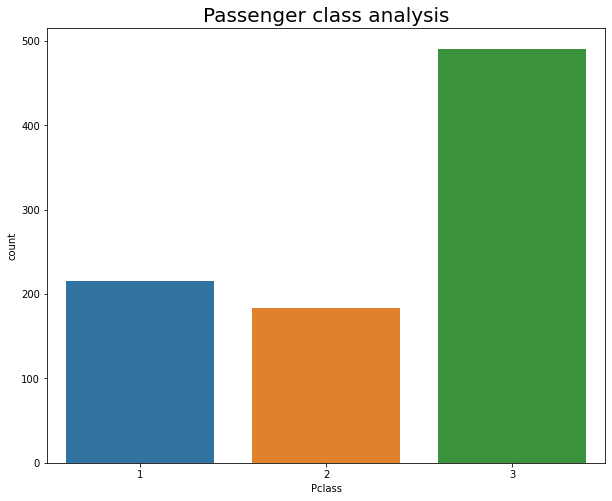

In [38]:
# Plotting the graph for passenger class
print(df["Pclass"].value_counts(normalize = True))
fig, axes = plt.subplots(figsize = (10,8))
sns.countplot(data = df, x = "Pclass")
count = df["Pclass"].value_counts()
sns.set_color_codes("pastel")
locs, labels = plt.xticks()
plt.title("Passenger class analysis", fontsize = 20)

Passengers in class three were the majority at 55%. It is possible that this is the economy class


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


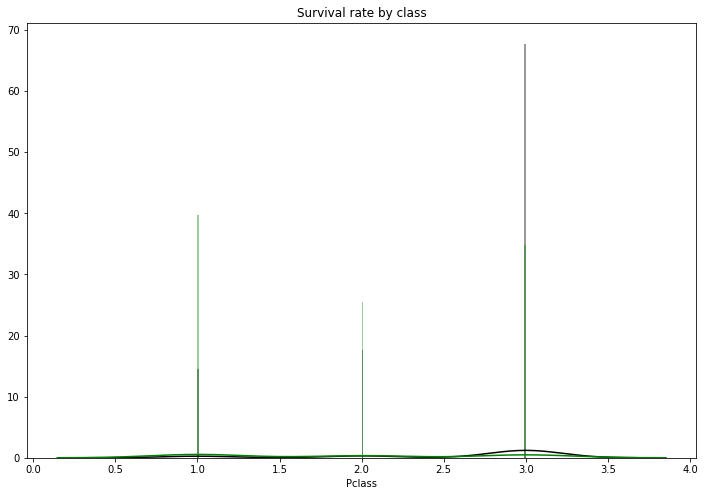

In [57]:
# Checking survival rate by class
print(df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False))
# Plotting the graph
group_1 = df.loc[df['Survived'] == 0]["Pclass"]
group_2 = df.loc[df['Survived'] == 1]["Pclass"]
plt.figure(figsize = (12,8))
plt.title('Survival rate by class')
sns.set_color_codes("pastel")
sns.distplot(group_1,kde=True,bins=200, color="black")
sns.distplot(group_2,kde=True,bins=200, color="green")
plt.show()


Most people who survived were in class one; which could be the first class of the ship

# Model design

**KNN**

In [82]:
# Converting Embarked, Sex and ticket column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Embarked']= le.fit_transform(df['Embarked'])
df["Sex"] = le.fit_transform(df["Sex"])
df["Ticket"] = le.fit_transform(df["Ticket"])

**Defining the target and predictor variables**

In [83]:
X = df.drop("Survived", axis =1)
y = np.array(df["Survived"])

**Correlation**

In [84]:
# Checking the correlation of the predictor variables
corr = X.corr()
corr

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.035144,0.042939,-0.057527,-0.001652,-0.056554,0.012658,0.013128
Pclass,-0.035144,1.000000,0.131900,0.083081,0.018443,0.319869,-0.549500,0.162098
Sex,0.042939,0.131900,1.000000,-0.114631,-0.245489,0.059372,-0.182333,0.108262
SibSp,-0.057527,0.083081,-0.114631,1.000000,0.414838,0.079461,0.159651,0.068230
Parch,-0.001652,0.018443,-0.245489,0.414838,1.000000,0.020003,0.216225,0.039798
Ticket,-0.056554,0.319869,0.059372,0.079461,0.020003,1.000000,-0.013885,-0.001729
Fare,0.012658,-0.549500,-0.182333,0.159651,0.216225,-0.013885,1.000000,-0.224719
Embarked,0.013128,0.162098,0.108262,0.068230,0.039798,-0.001729,-0.224719,1.000000


There's a low correlation between the variables hence low multicollinearity

In [85]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [86]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [87]:
# Training and prediction
from sklearn.neighbors import KNeighborsClassifier
folds = KNeighborsClassifier(n_neighbors=5)
folds.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [89]:
# Making prediction of the dataset
y_pred = folds.predict(X_test)

In [102]:
# Creating a confusion matrix and calculating precision score, recall score and F1 score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))

print("Accuracy score KNN:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision score KNN:",metrics.precision_score(y_test, y_pred)*100)
print("Recall score kNN:",metrics.recall_score(y_test, y_pred)*100)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)



[[83 16]
 [21 59]]
Accuracy score KNN: 79.3296089385475
Precision score KNN: 78.66666666666666
Recall score kNN: 73.75
F1 score: 0.761290


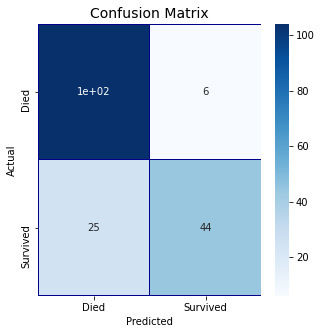

In [107]:
# Plotting confusion matrix
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Using a test pf 30% and a train data set of 70% with KNN

In [120]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [121]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [122]:
# Training and prediction
from sklearn.neighbors import KNeighborsClassifier
folds2 = KNeighborsClassifier(n_neighbors=5)
folds2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [123]:
# Making prediction of the dataset
y_pred2 = folds.predict(X_test)

In [124]:
# Creating a confusion matrix and calculating precision score, recall score and F1 score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred2))

print("Accuracy score KNN:",metrics.accuracy_score(y_test, y_pred2)*100)
print("Precision score KNN:",metrics.precision_score(y_test, y_pred2)*100)
print("Recall score kNN:",metrics.recall_score(y_test, y_pred2)*100)
f1 = f1_score(y_test, y_pred2)
print('F1 score: %f' % f1)

[[150  18]
 [ 25  75]]
Accuracy score KNN: 83.95522388059702
Precision score KNN: 80.64516129032258
Recall score kNN: 75.0
F1 score: 0.777202


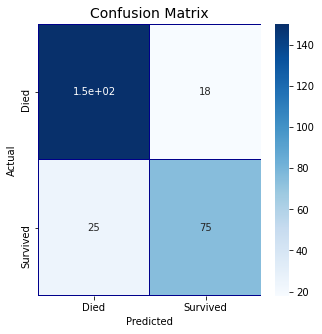

In [125]:
# Plotting confusion matrix
cm = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Using 70-30 split gives us better scores

**Catboost**

> 



In [128]:
!pip3 install catboost

     |████████████████████████████████| 64.8MB 72kB/s 


In [132]:
# catboost for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model


# Split data into features and Labels
#
X = df.drop("Survived", axis =1)
y = np.array(df["Survived"])

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

# fit the model on the whole dataset
model = CatBoostClassifier(verbose=0, n_estimators=100)
model.fit(X_train, y_train)

# make a single prediction
y_pred3 = model.predict(X_test)
y_pred3

print("Accuracy score after CatBoost:",metrics.accuracy_score(y_test, y_pred3)*100)
print("Precision score after CatBoost:",metrics.precision_score(y_test, y_pred3)*100)
print("Recall score after CatBoost:",metrics.recall_score(y_test, y_pred3)*100)
f1 = f1_score(y_test, y_pred3)
print('F1 score: %f' % f1)



Accuracy score after CatBoost: 83.24022346368714
Precision score after CatBoost: 78.26086956521739
Recall score after CatBoost: 78.26086956521739
F1 score: 0.782609


# Recommendation

Comparing KNN and Catboost, at a 80-20 split; Catboost gives better results. However, at 70-30 split, KNN gives better results. Therefore, changing the train_test split is a way of tuning the parameters